<h1>Fundamentals of Data Science, Introduction week 2</h1>

**GOAL** In this notebook we are going to cover the following practical aspects of data science:

- Reading a csv file and loading it to a dataframe in python using pandas library
- Filtering out the required columns in the dataframe
- Summarising data based on the fields. Ex: Summing up all the rows corresponding to a certain entry in the dataset
- Plot shape of United States using the geographic data i.e. data with all the coordinates
- Scale and move the states using data of the coordinates
- Colour the states based on the average age of their population

To complete this assignment you need to have a running Anaconda installation with Python 3.6 or 3.7 on your device. Python package prerequisites include:
+  **pandas**
+  **gdal**
+  **shapely**
+  **descartes**

To get these packages installed type 'conda install {package}' into the terminal (linux) or the Anaconda prompt (Windows), for each package you don't have. Gdal can be a bit fussy, there is an alternative install method at the end of this notebook.

**Pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

Pandas is well suited for many different kinds of data:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. 

In [1]:
# Import all the libraries required
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

<h3>A look at the data</h3>
Throughout this assignment, the dataset that we would be using will be the US population statistics 2010-2016. It can be downloaded from 

https://www2.census.gov/programs-surveys/popest/datasets/2010-2016/state/asrh/.

As a first step, we will structure the data into a pandas DataFrame to simplify the data manipulation. We will start by loading the csv file of data into a DataFrame called population_data and we will then filter columns based on our use. *Take a look at the data and its fields*

In [2]:
population_data = pd.read_csv('sc-est2016-agesex-civ.csv')
# For viewing the complete dataset
population_data

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV
0,10,0,0,0,United States,0,0,3944160,3951400,3963239,3926677,3931346,3955374,3975414,3970145
1,10,0,0,0,United States,0,1,3978090,3957847,3966617,3978101,3943114,3950083,3974980,3995008
2,10,0,0,0,United States,0,2,4096939,4090856,3971363,3980016,3992752,3959663,3967361,3992154
3,10,0,0,0,United States,0,3,4119051,4111929,4102483,3982920,3992660,4006960,3974468,3982074
4,10,0,0,0,United States,0,4,4063186,4077557,4122286,4112795,3994261,4005464,4020276,3987656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,40,4,8,56,Wyoming,2,82,1102,1104,1081,1129,1185,1044,1072,1095
13568,40,4,8,56,Wyoming,2,83,911,937,1036,1035,1047,1095,961,998
13569,40,4,8,56,Wyoming,2,84,894,884,891,1050,998,992,1050,916
13570,40,4,8,56,Wyoming,2,85,5623,5646,5742,5908,6294,6351,6460,6562


In [3]:
population_data.shape

(13572, 15)

The complete dataset has 13,572 rows and 15 columns. It can be verified by looking at the shape of your dataframe by <i>population_data.shape</i>. To select specific columns, create a list of column names and view the dataframe as:

In [4]:
# Filtering the data by the columns ['NAME','SEX','AGE','POPEST2016_CIV']
population_data[['NAME','SEX','AGE','POPEST2016_CIV']]

,NAME,SEX,AGE,POPEST2016_CIV
0,United States,0,0,3970145
1,United States,0,1,3995008
2,United States,0,2,3992154
3,United States,0,3,3982074
4,United States,0,4,3987656
...,...,...,...,...
13567,Wyoming,2,82,1095
13568,Wyoming,2,83,998
13569,Wyoming,2,84,916
13570,Wyoming,2,85,6562


In [5]:
# Filters out data for all sexes and all age group and store in a new dataframe 'population_data_all'
population_data_all = population_data[population_data['SEX']==0]
population_data_all = population_data_all[population_data_all['AGE']!=999]

In [6]:
# Sum the population of each state for each year on the dataset 'population_data_all'
population_sums = population_data_all.groupby(by=['NAME'], as_index=False)[['POPEST2010_CIV','POPEST2011_CIV','POPEST2012_CIV',
                                              'POPEST2013_CIV','POPEST2014_CIV','POPEST2015_CIV','POPEST2016_CIV']]
population_sums

In [7]:
population_data_all.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV
0,10,0,0,0,United States,0,0,3944160,3951400,3963239,3926677,3931346,3955374,3975414,3970145
1,10,0,0,0,United States,0,1,3978090,3957847,3966617,3978101,3943114,3950083,3974980,3995008
2,10,0,0,0,United States,0,2,4096939,4090856,3971363,3980016,3992752,3959663,3967361,3992154
3,10,0,0,0,United States,0,3,4119051,4111929,4102483,3982920,3992660,4006960,3974468,3982074
4,10,0,0,0,United States,0,4,4063186,4077557,4122286,4112795,3994261,4005464,4020276,3987656


The United States of America is a federal republic[1] consisting of 50 states, a federal district (Washington, D.C., the capital city of the United States), five major territories, and various minor islands.[2][3] The 48 contiguous states and Washington, D.C., are in North America between Canada and Mexico, while Alaska is in the far northwestern part of North America and Hawaii is an archipelago in the mid-Pacific. Territories of the United States are scattered throughout the Pacific Ocean and the Caribbean Sea.

<h3> Get a US states geojson file </h3>        
Sources
- ArcGIS shapefile of US 50 states + DC 

(https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5)
<h4> Recommended – convert to GeoJSON </h4>   
<i> ogr2ogr  -f  GeoJSON  [name1].shp [name2].geojson   </i> - where, 'name1' is the name of the downloaded shp file and 'name2' is the name you want to specify for the geojson file

** NOTE: ** If you are having trouble with this, or you are using Windows, then you can also use https://mapshaper.org/ to convert between formats. During the upload to mapshaper you need to upload <u>all</u> the files from the states_21basic.zip file before conversion. Otherwise you will miss relevant features. 

<Figure size 432x288 with 0 Axes>

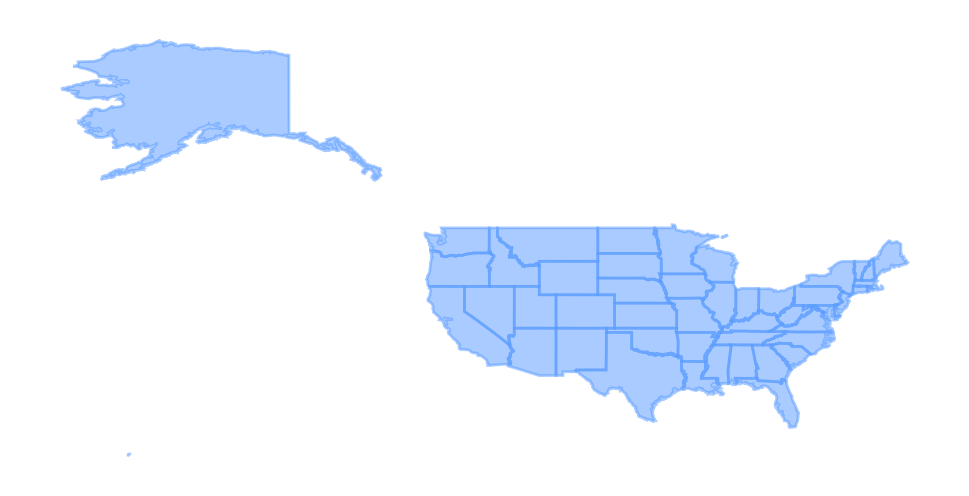

In [8]:
S_DIR = r'/home/enhope/Downloads/states_21basic' 
BLUE = '#5599ff'

with open(os.path.join(S_DIR, 'states.geojson')) as rf:    
    data = json.load(rf)
    
plt.cla()
plt.clf()

fig = plt.figure(dpi=200) 
ax = fig.gca()
for feature in data['features']:
    geometry = feature['geometry']
    if geometry['type'] == 'Polygon':
        poly = geometry
        ppatch = PolygonPatch(poly, fc=BLUE, ec=BLUE,  alpha=0.5, zorder=2)
        ax.add_patch(ppatch)
    elif geometry['type'] == 'MultiPolygon':
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ppatch = PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
            ax.add_patch(ppatch)
    else:
        print('Don\'t know how to draw :', geometry['type'])

ax.axis('scaled')
plt.axis('off')
plt.show()

**TASKS** <font color="red">
<h3> Improve the map </h3>
    
1) Try a different projection (example: US Census Bureau shapefile)
    
2) Resize and move Alaska 

3) Color the map based on the average age of each state for the year 2016 


# TASK 1

Another projection based on:

ftp://ftp2.census.gov/geo/tiger/TIGER2019/STATE/

In [9]:
GRAY = '#999999'
DARKRED = '#8B0000'

In [10]:
## Draw a map based on the data from a json shape.
#  @param data The json shape.
#  @param fc The foreground color (list).
#  @param ec The edge color (list).
def draw_map(data, ax, fc=[GRAY, BLUE], ec=[GRAY, GRAY]):
    for feature in data['features']:
        geometry = feature['geometry']
        if geometry['type'] == 'Polygon':
            poly = geometry
            ppatch = PolygonPatch(poly, 
                                  fc=fc[0], 
                                  ec=ec[0],  
                                  alpha=0.5, 
                                  zorder=2)
            ax.add_patch(ppatch)
        elif geometry['type'] == 'MultiPolygon':
            for polygon in geometry['coordinates'][0]:
                poly = Polygon(polygon)
                ppatch = PolygonPatch(poly, 
                                      fc=fc[1], 
                                      ec=ec[0], 
                                      alpha=0.5, 
                                      zorder=2)
                ax.add_patch(ppatch)
        else:
            print('Don\'t know how to draw :', geometry['type'])


<Figure size 432x288 with 0 Axes>

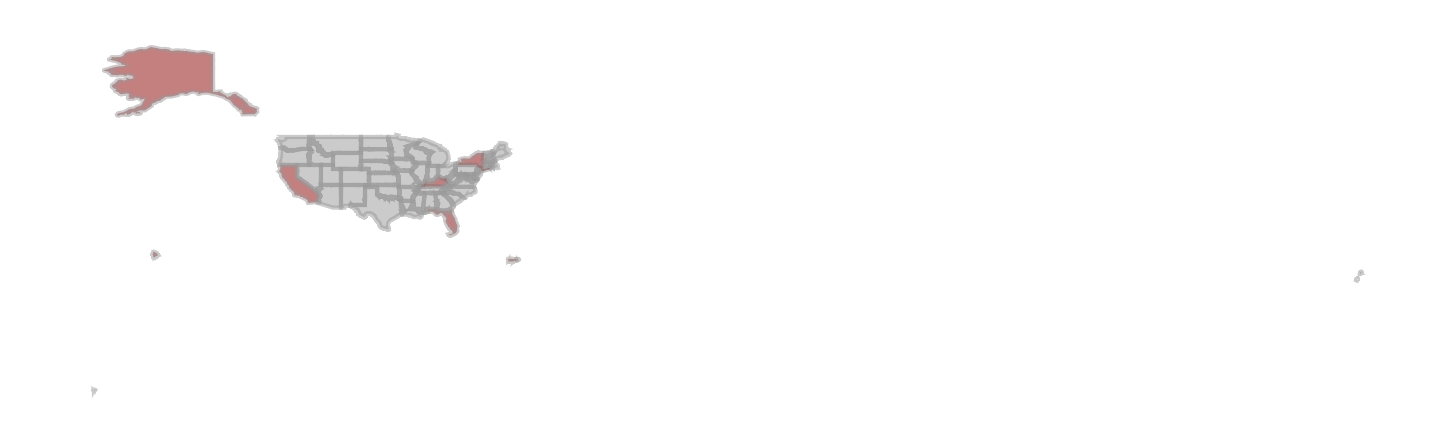

In [11]:
T_DIR = r'/home/enhope/Downloads/tl_2019_us_state' 

with open(os.path.join(T_DIR, 'tl_2019_us_state.geojson')) as rf:    
    secondata = json.load(rf)
    
plt.cla()
plt.clf()
fig = plt.figure(dpi=300) 
ax = fig.gca()

draw_map(secondata, ax, fc=[GRAY, DARKRED])

ax.axis('scaled')
plt.axis('off')
plt.show()

# TASK 2 Resize and Move Alaska

In [12]:
# Get alaska coordinate and change it to move lower
how_low = 30

with open(os.path.join(S_DIR, 'states.geojson')) as rf:    
    alaskalower = json.load(rf)

for each_state in alaskalower['features']:
    if each_state['properties']['STATE_NAME'] == 'Alaska':
        for each_coor in each_state['geometry']['coordinates'][0]:
            for each_single_coor in each_coor:
                each_single_coor[0] *= 1.2
                each_single_coor[1] -= how_low

<Figure size 432x288 with 0 Axes>

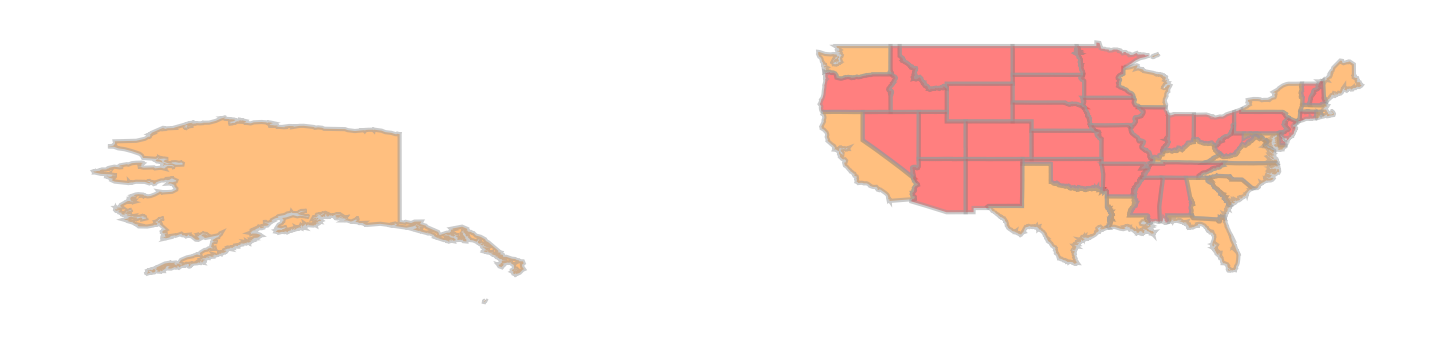

In [13]:
plt.cla()
plt.clf()
fig = plt.figure(dpi=300) 
ax = fig.gca()

draw_map(alaskalower, ax, fc=['red', '#FF8000'])

ax.axis('scaled')
plt.axis('off')
plt.show()

alaskalower = None

<AxesSubplot:>

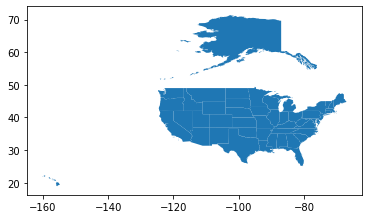

In [20]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import Point, Polygon
import numpy as np

poly_States = gpd.read_file(os.path.join(S_DIR, 'states.shp'))

m = poly_States.STATE_ABBR == "AK"
poly_States[m] = poly_States[m].set_geometry(poly_States[m].translate(54))

poly_States.plot()

<AxesSubplot:>

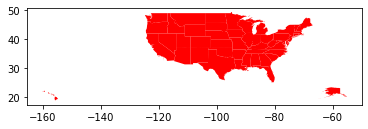

In [21]:
poly_States[m] = poly_States[m].set_geometry(poly_States[m].scale(.2,.2,.2).translate(40, -40))
poly_States.plot(color='red')

# TASK 3 Color the map based on the average age of each state for the year 2016 


In [31]:
population_data_states = population_data_all[population_data_all.NAME != 'United States']
population_data_states = population_data_states[['NAME', 'AGE', 'POPEST2016_CIV']]

# https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2016/sc-est2016-agesex-civ.pdf

population_data_states.head()

,NAME,AGE,POPEST2016_CIV
261,Alabama,0,58269
262,Alabama,1,58884
263,Alabama,2,58980
264,Alabama,3,57778
265,Alabama,4,58654


In [32]:
population_piv = population_data_states.pivot(index='NAME', columns='AGE', values='POPEST2016_CIV')
population_piv

AGE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85
NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,58269,58884,58980,57778,58654,59413,59729,60127,62104,62244,61435,61009,61318,60927,61692,64400,65951,63887,62954,62616,62839,65365,67153,67180,68080,70512,70552,65547,62516,60417,60924,61245,59300,60895,60479,61158,62476,58901,58617,57817,...,64519,61293,59724,59919,62155,66482,67748,67453,67732,68912,69063,66860,66629,67171,64827,63937,61832,58923,56832,55329,54570,53486,52929,54996,40239,40088,39043,39739,34250,31234,29716,27884,26482,23640,22259,21053,18380,16828,15653,86753
Alaska,10938,10798,11061,11166,10152,11330,10482,10393,10606,10265,10363,9962,9957,9957,9807,9753,10299,10038,8874,7959,8859,9418,9895,10645,11639,11842,11942,11411,11073,11066,11200,10927,10754,10639,10419,9964,10004,8920,9047,8612,...,9548,8783,8559,8810,8828,9734,9806,10082,10274,10228,10609,10029,10007,10000,9355,9710,9050,8419,7864,7341,6993,6633,5877,5984,4343,4315,3813,3827,3261,2834,2598,2227,2061,1835,1674,1506,1361,1217,1086,6420
Arizona,87702,88450,87328,87798,88041,87129,87993,90192,93651,95192,93576,92868,90402,91911,90267,92733,94180,92075,93367,93224,91616,94075,95768,98283,99347,102736,101299,95493,91496,88832,88465,89847,87544,89728,89706,89506,91009,84743,83177,82616,...,89092,83355,81059,79581,80286,85423,86481,86158,86861,87170,88944,85782,85219,84761,82128,82213,80379,78341,76143,76250,76931,76146,78043,80004,60850,60732,60151,60666,53047,48520,45365,42217,39800,35847,33381,30883,26610,25326,23321,136834
Arkansas,37737,38010,38064,37943,38523,38723,38399,38817,40026,40578,40065,39669,39655,39300,38829,40022,40727,39966,39006,39255,39946,40176,40802,40537,40701,42895,41743,40045,38471,37428,37598,38132,37476,38181,38419,38310,39406,36757,36077,35719,...,38393,36063,35061,35069,35873,39126,40198,40657,39746,40357,40484,39284,38961,38785,37607,37436,36471,35084,33840,33210,32345,32201,31862,33683,24720,24856,24499,24510,21694,19975,19170,17411,16268,14636,13800,13262,11549,10661,9742,56680
California,498832,499652,495608,498302,494978,509354,498601,497148,516395,518128,510902,508649,505998,500697,496229,510524,518946,513779,520499,504551,514464,529647,549387,569384,593484,627236,631871,608745,590935,574377,570855,575764,556700,560243,559687,545901,558990,516461,507614,505501,...,551119,520424,505710,494953,498465,524377,527145,522360,515584,517257,527905,497183,490988,481863,465018,461752,436642,416278,393525,380498,377249,357683,347434,357807,274736,269836,253256,250732,219771,201490,192791,178819,169447,155715,146535,138767,124268,117971,109497,722333
Colorado,67691,67507,67410,67295,67561,69064,70073,69875,71867,72465,72569,72340,72729,71676,70361,71022,70986,68881,70618,71563,69413,71423,75612,80389,84125,85253,85916,82873,82063,82080,83487,82778,80527,81496,81500,79885,80676,75255,73961,72218,...,76106,71877,68027,66401,66861,70965,72488,72979,74141,75177,76018,73467,72577,71915,69674,68216,66534,64337,61314,58671,56853,53803,53338,54689,39646,37907,36150,36180,30543,27656,25593,23785,22048,20066,18816,17598,15637,14872,13902,85771
Connecticut,36202,36719,37179,36994,38227,38814,39505,39750,41521,42319,43208,43944,45088,44965,45637,46604,48143,48475,51516,52074,52439,50981,48526,47904,45824,44495,43205,42415,43379,44748,44928,44718,43115,43768,44116,42905,44611,41966,41509,41105,...,51235,49534,49221,50413,52730,55300,56093,55206,55129,56261,56103,54425,53937,52380,50524,48992,46492,44087,41325,39279,37595,36191,36121,39154,28387,27520,26952,28756,24013,21183,19737,18574,17647,16302,15512,14986,13667,13230,12669,89928
Delaware,10817,10896,10995,10969,11157,11451,11381,11094,11404,11462,11507,11441,11587,11640,11102,11709,11911,11751,12745,12272,11700,11333,11527,12153,12759,13134,13642,14085,13415,12284,

In [33]:
state_age_dict = {}

for state_name, row in population_piv.iterrows():
    # In here row becomes a series.
    total_age = 0
    total_multiplied_age = 0
    for index, each_age in row.iteritems():
        # Uncomment this for printing out.
        # print((index, each_age))
        total_age += each_age
        total_multiplied_age += (index * each_age)
    average_age = total_multiplied_age / total_age
    # Uncomment this for printing out.
    # print(state_name)
    state_age_dict[state_name] = average_age
    
state_age_dict

{'Alabama': 38.97578134504552,
 'Alaska': 35.559921965578766,
 'Arizona': 38.507104208415385,
 'Arkansas': 38.535536576134675,
 'California': 37.405932493734625,
 'Colorado': 37.544181032721575,
 'Connecticut': 39.928389838225876,
 'Delaware': 39.95958711021429,
 'District of Columbia': 36.46608995824548,
 'Florida': 41.35447854650024,
 'Georgia': 37.03476835601223,
 'Hawaii': 39.729454296854634,
 'Idaho': 37.254467198864475,
 'Illinois': 38.28940578166548,
 'Indiana': 38.06031279400413,
 'Iowa': 38.73334824829518,
 'Kansas': 37.714083426648635,
 'Kentucky': 38.74185200073929,
 'Louisiana': 37.674525374026516,
 'Maine': 42.17718041277033,
 'Maryland': 38.56060480244391,
 'Massachusetts': 39.509917545026724,
 'Michigan': 39.36626852187449,
 'Minnesota': 38.41613928266109,
 'Mississippi': 37.901561513421335,
 'Missouri': 38.90162351478396,
 'Montana': 39.943434969661205,
 'Nebraska': 37.569051464246456,
 'Nevada': 38.20683569001058,
 'New Hampshire': 40.98070294124706,
 'New Jersey': 39.

In [34]:
## Draw a map based on the data from a json shape.
#  @param data The json shape.
def draw_map_simplified(feature, ax, color):
    geometry = feature['geometry']
    if geometry['type'] == 'Polygon':
        poly = geometry
        ppatch = PolygonPatch(poly, 
                              fc=color, 
                              ec='black',  
                              alpha=0.5, 
                              zorder=2)
        ax.add_patch(ppatch)
    elif geometry['type'] == 'MultiPolygon':
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ppatch = PolygonPatch(poly, 
                                  fc=color, 
                                  ec='black',
                                  alpha=0.5, 
                                  zorder=2)
            ax.add_patch(ppatch)
    else:
        raise ('Don\'t know how to draw :', geometry['type']) 

In [35]:
## Return a dictionary of state name and the average age in that state.
#  @return The dictionary of state and average age.
def get_state_age_dictionary():    
    U_DIR = r'/home/enhope/Development/UvA_FDS/2020_Werkcollege/Second_Week'
    # Read from the text.
    population_data = pd.read_csv(U_DIR + '/' + 'sc-est2016-agesex-civ.csv')
    # Filters out data for all sexes and all age group and store in a new dataframe 'population_data_all'
    population_data_all = population_data[population_data['SEX']==0]
    population_data_all = population_data_all[population_data_all['AGE']!=999]
    
    # Filter this by removing united states (we only want the individual states)
    population_data_states = population_data_all[population_data_all.NAME != 'United States']
    # Filter on these three columns only.
    population_data_states = population_data_states[['NAME', 'AGE', 'POPEST2016_CIV']]
    
    # Make a pivot table
    population_piv = population_data_states.pivot(index='NAME', columns='AGE', values='POPEST2016_CIV')
    
    state_age_dict = {}
    
    for state_name, row in population_piv.iterrows():
        # In here row becomes a series.
        total_age = 0
        total_multiplied_age = 0
        for index, each_age in row.iteritems():
            # Uncomment this for printing out.
            # print((index, each_age))
            total_age += each_age
            total_multiplied_age += (index * each_age)
        average_age = total_multiplied_age / total_age
        # Uncomment this for printing out.
        # print(state_name)
        state_age_dict[state_name] = average_age
        
    return state_age_dict

In [36]:
## Convert age from numbers to string that represent colors.
#  @param age The age in numbers
#  @return The color in strings
def age_to_color(age):
    if age < 35:
        return 'red'
    elif age >= 35 and age < 37:
        return 'orange'
    elif age >= 37 and age < 39:
        return 'yellow'
    else:
        return 'green'

In [37]:
## Return a dictionary of state name which maps to a list: geometry and a color.
#  @return The dictionary of state_geo_color
def draw_colorful():
    # Cycle through the state_age dictionary!
    sa_dict = get_state_age_dictionary()
    
    with open(os.path.join(S_DIR, 'states.geojson')) as rf:    
        data = json.load(rf)
    
    fig = plt.figure(dpi=300) 
    ax = fig.gca()
    
    for state_name, age in sa_dict.items():
        state_feature = next(n for idx,n in enumerate(data['features']) if n['properties']['STATE_NAME'] == state_name)
        draw_map_simplified(state_feature, ax, age_to_color(age))

    ax.axis('scaled')
    ax.axis('off')

    plt.show()    

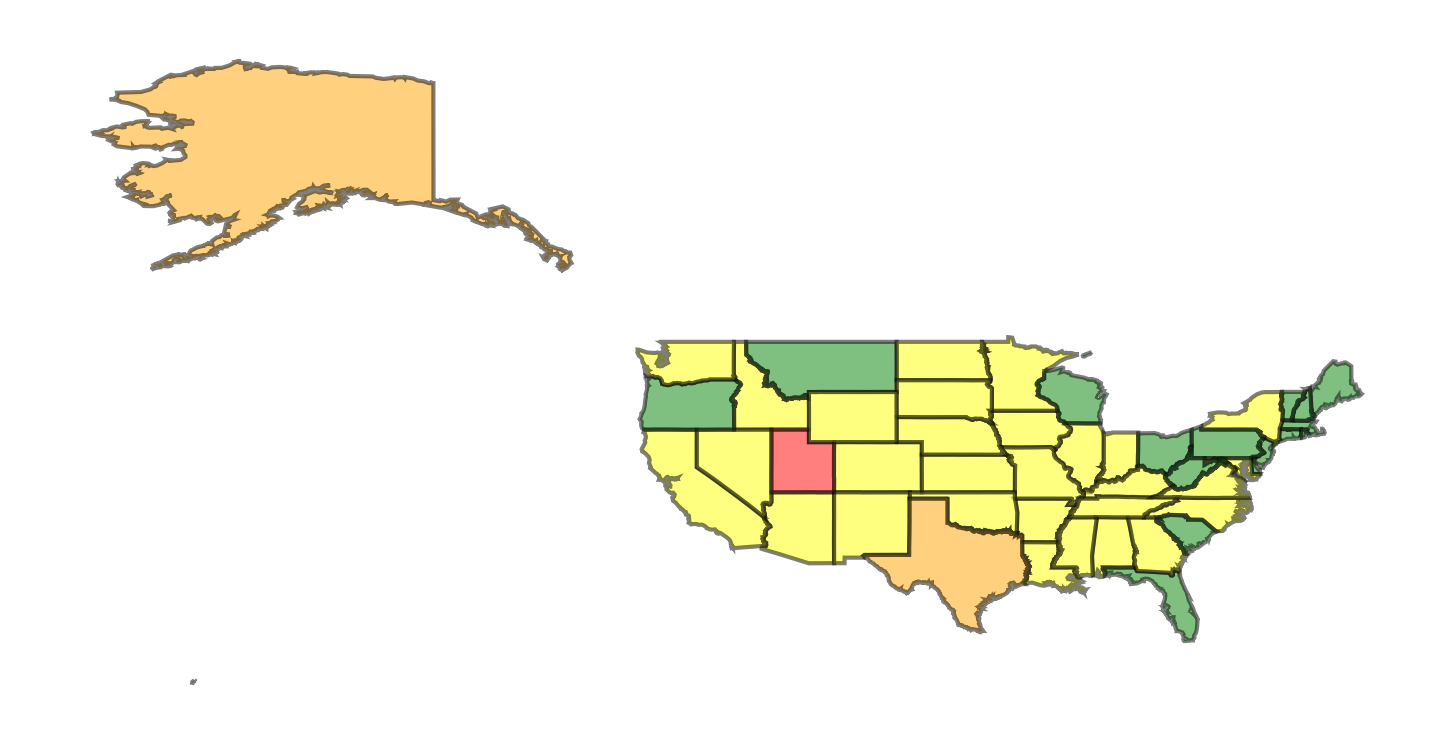

In [38]:
draw_colorful()

In [66]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import Point, Polygon
import numpy as np
from matplotlib import cm



<AxesSubplot:>

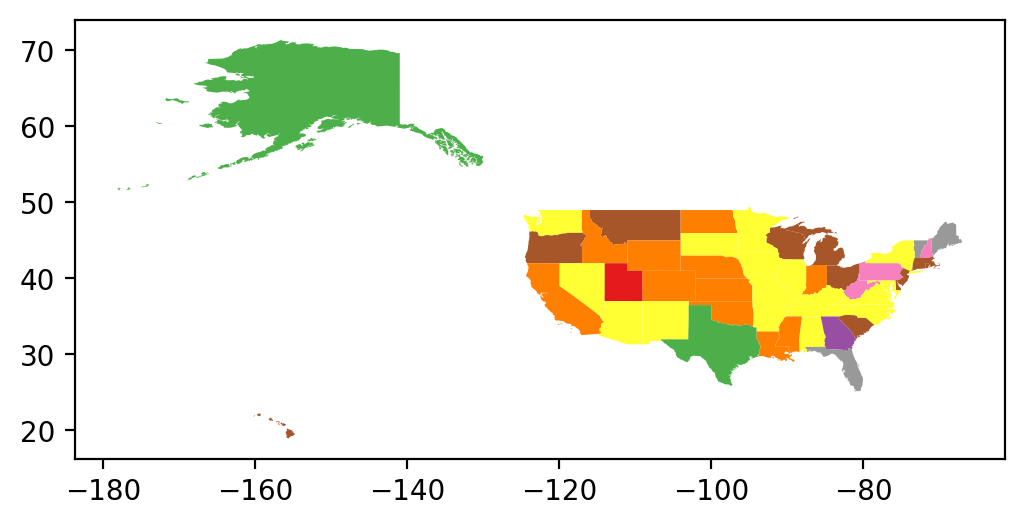

In [71]:
poly_States = gpd.read_file(os.path.join(S_DIR, 'states.shp'))

sa = get_state_age_dictionary()
de = {'STATE_NAME' : list(sa.keys()),
    'AVERAGE': list(sa.values())}
ddd = pd.DataFrame(de)
merged = pd.merge(poly_States, ddd, on='STATE_NAME')

fig = plt.figure(dpi=200)
merged.plot(column='AVERAGE', ax = fig.gca(), cmap='Set1')
# https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

<h3> Installations for GDAL </h3>

** IMPORTANT NOTE ** Only follow these if 'conda install gdal' does not work

GDAL - Geospatial Data Abstraction Library <br>
    http://www.gdal.org/index.html

For example,
** On Linux Fedora:** 
         <ul><i>yum install libpng</i>   
         <i> yum install libtiff </i>  
         <i> sudo dnf install gdal gdal-devel</i><br>
         
** In Ubuntu:**
         <ul><i>sudo add-apt-repository ppa:ubuntugis/ppa && sudo apt-get update</i>   
         <i> sudo apt-get install gdal-bin </i>  
         <i> To verify after installation, try: $ ogrinfo</i><br>
         <i> If the installation was successful, you will see something like this:

+ Usage: ogrinfo [--help-general] [-ro] [-q] [-where restricted_where]
               [-spat xmin ymin xmax ymax] [-fid fid]
               [-sql statement] [-al] [-so] [-fields={YES/NO}]
               [-geom={YES/NO/SUMMARY}][--formats]
               datasource_name [layer [layer ...]]
</i><br>
        
**In Windows:**
         Refer to https://sandbox.idre.ucla.edu/sandbox/tutorials/installing-gdal-for-windows   